# Capstone Project: Data Collection     

29/11/2020

The code here illustrates how I collected restaurant data via the Foursquare API for the city of Munich. The data for other cities was collected in a similar fashion.

In [16]:
import pandas as pd
import numpy as np
import requests 
import json # library to handle JSON files
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

#!pip install folium
import folium # map rendering library

In [2]:
# Coordinates of Munich
latitude = 48.1351
longitude = 11.5320

# create map of Toronto using latitude and longitude values
map_munich = folium.Map(location=[latitude, longitude], zoom_start=10)
    
map_munich

In [3]:
# The code was removed by Watson Studio for sharing.

In [4]:
# List of categories
afghan = '503288ae91d4c4b30a586d67'
african = '4bf58dd8d48988d1c8941735'
american = '4bf58dd8d48988d14e941735'
asian = '4bf58dd8d48988d142941735'
australian = '4bf58dd8d48988d169941735'
austrian = '52e81612bcbc57f1066b7a01'
bangladesh = '5e179ee74ae8e90006e9a746'
belgium = '52e81612bcbc57f1066b7a02'
cajun = '4bf58dd8d48988d17a941735'
caribbean = '4bf58dd8d48988d144941735'
caucasian = '5293a7d53cf9994f4e043a45'
czech = '52f2ae52bcbc57f1066b8b81'
dutch = '5744ccdfe4b0c0459246b4d0'
eastEurope = '4bf58dd8d48988d109941735'
english = '52e81612bcbc57f1066b7a05'
french = '4bf58dd8d48988d10c941735'
german = '4bf58dd8d48988d10d941735'
greek = '4bf58dd8d48988d10e941735'
hungary = '52e81612bcbc57f1066b79fa'
indian = '4bf58dd8d48988d10f941735'
italian = '4bf58dd8d48988d110941735'
jewish = '52e81612bcbc57f1066b79fd'
latin = '4bf58dd8d48988d1be941735'
meditarranean = '4bf58dd8d48988d1c0941735'
mexican = '4bf58dd8d48988d1c1941735'
middleEast = '4bf58dd8d48988d115941735'
modernEuropean = '52e81612bcbc57f1066b79f9'
pakistan = '52e81612bcbc57f1066b79f8'
polish = '52e81612bcbc57f1066b7a04'
portugal = '4def73e84765ae376e57713a'
russia = '5293a7563cf9994f4e043a44'
scandinavia = '4bf58dd8d48988d1c6941735'
scotland = '5744ccdde4b0c0459246b4a3'
slovak = '56aa371be4b08b9a8d57355a'
spain = '4bf58dd8d48988d150941735'
srilanka = '5413605de4b0ae91d18581a9'
swiss = '4bf58dd8d48988d158941735'
turkey = '4f04af1f2fb6e1c99f3db0bb'
ukraine = '52e928d0bcbc57f1066b7e96'

category_list = [afghan,african,american,asian,australian,austrian,bangladesh,belgium,cajun,caribbean,caucasian,czech,dutch,eastEurope,english,
                 french,german,greek,hungary,indian,italian,jewish,latin,meditarranean,mexican,middleEast,modernEuropean,pakistan,polish,
                 portugal,russia,scandinavia,scotland,slovak,spain,srilanka,swiss,turkey,ukraine] 

CATEGORIES = ','.join(category_list)

In [5]:
def getVenues(latitude, longitude, RADIUS=500):
    
    url = 'https://api.foursquare.com/v2/venues/search?&categoryId={}&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&intent=browse'.format(
            CATEGORIES,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            latitude, 
            longitude, 
            RADIUS,
            LIMIT)
    
    response = requests.get(url)
    results = response.json()
    
    if response.status_code == 200:
        venues = results['response']['venues']
    else:
        venues = []
        print("HTTP-{}".format(response.status_code))
        
    venue_list = []
    
    number_of_venues = len(venues)
    
    for i in range(number_of_venues):
        
        try:
            venue_id = venues[i]['id']
            venue_name = venues[i]['name']
            lat = venues[i]['location']['lat']
            lng = venues[i]['location']['lng']
            category = venues[i]['categories'][0]['name']
            
            record = (latitude, longitude, number_of_venues, i, venue_id, venue_name, lat, lng, category)
        except:
            record = (latitude, longitude, number_of_venues, i, '', '', '', '', '')
        
        venue_list.append(record)
        
        
    return( venue_list )

In [6]:
# Coordinates of Munich
latitude = 48.1351
longitude = 11.5320

# Box boundaries
y_max = latitude + 0.08
y_min = latitude - 0.07
x_max = longitude + 0.14
x_min = longitude - 0.12


lat_centre = (y_max+y_min)/2.0

y_step = 1.0/(110.574)
x_step = 1.0/(111.32*np.cos(2.0*np.pi*lat_centre/360.0))

num_x_points = int((x_max-x_min)/x_step)
num_y_points = int((y_max-y_min)/y_step)

lats = np.linspace(x_min,x_max,num_x_points)
longs = np.linspace(y_min,y_max,num_y_points)

' Create matrix of coordinate values '
coord_list = []
for x in longs:
    for y in lats:
        
        coord_list.append( (x,y) )

print("Number of points = {}".format(len(coord_list)))

Number of points = 304


In [7]:
# Coordinates of Munich
latitude = 48.1351
longitude = 11.5320

# create map of Toronto using latitude and longitude values
map_munich = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for coord in coord_list:
    lat = coord[0]
    lng = coord[1]
    label = '{} {}'.format(lat,lng)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=1,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_munich)  
    
map_munich

## Retrieve data from Foursquare

In [17]:
record_list = []

for coord in coord_list:
    
    lat = coord[0]
    lng = coord[1]
    
    venue_details = getVenues(lat, lng)
    
    record_list.extend(venue_details)
    
    print("lat = {} long = {} Number of Venues = {}".format(lat,lng,len(venue_details)))

    
col_names = ['lat_centre','long_centre','num_venues','venue_iter','venue_id','venue_name','lat_venue','long_venue','category']
df_venues = pd.DataFrame.from_records(record_list,columns=col_names)  

df_venues.to_csv('munich_20201211_2000.csv',encoding='utf-8')

lat = 48.0651 long = 11.412 Number of Venues = 0
lat = 48.0651 long = 11.4264444444 Number of Venues = 0
lat = 48.0651 long = 11.4408888889 Number of Venues = 0
lat = 48.0651 long = 11.4553333333 Number of Venues = 0
lat = 48.0651 long = 11.4697777778 Number of Venues = 0
lat = 48.0651 long = 11.4842222222 Number of Venues = 0
lat = 48.0651 long = 11.4986666667 Number of Venues = 0
lat = 48.0651 long = 11.5131111111 Number of Venues = 0
lat = 48.0651 long = 11.5275555556 Number of Venues = 2
lat = 48.0651 long = 11.542 Number of Venues = 2
lat = 48.0651 long = 11.5564444444 Number of Venues = 2
lat = 48.0651 long = 11.5708888889 Number of Venues = 0
lat = 48.0651 long = 11.5853333333 Number of Venues = 0
lat = 48.0651 long = 11.5997777778 Number of Venues = 0
lat = 48.0651 long = 11.6142222222 Number of Venues = 14
lat = 48.0651 long = 11.6286666667 Number of Venues = 1
lat = 48.0651 long = 11.6431111111 Number of Venues = 0
lat = 48.0651 long = 11.6575555556 Number of Venues = 9
lat =

In [18]:
print("Limit breached in {} sites".format(sum(df_venues['num_venues']==50)/50))
np.unique(df_venues[df_venues['num_venues']==50][['lat_centre','long_centre']], axis=0)

Limit breached in 9 sites


array([[48.1251    , 11.55644444],
       [48.1251    , 11.59977778],
       [48.1351    , 11.542     ],
       [48.1351    , 11.55644444],
       [48.1351    , 11.57088889],
       [48.1351    , 11.58533333],
       [48.1451    , 11.55644444],
       [48.1551    , 11.57088889],
       [48.1651    , 11.58533333]])

## Calculate new site locations at breached points

In [19]:
zoom_coord_list = np.unique(df_venues[df_venues['num_venues']==50][['lat_centre','long_centre']], axis=0).tolist()

In [20]:
coord_list = []

for coord in zoom_coord_list:
    
    x = coord[1]
    y = coord[0]
    
    y_step = 1.0/(110.574)
    x_step = 1.0/(111.32*np.cos(2.0*np.pi*y/360.0))

    xleft = x - (x_step/4.0)
    xright = x + (x_step/4.0)
    ytop = y + (y_step/4.0)
    ybottom = y - (y_step/4.0)
    
    coord_list.append( (y,x) )
    coord_list.append( (ytop,xleft) )
    coord_list.append( (ybottom,xleft) )
    coord_list.append( (ytop,xright) )
    coord_list.append( (ybottom,xright) )

In [21]:
# Coordinates of Munich
latitude = 48.1351
longitude = 11.5320

# create map of Toronto using latitude and longitude values
map_munich = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for coord in coord_list:
    lat = coord[0]
    lng = coord[1]
    label = '{} {}'.format(lat,lng)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=1,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_munich)  
    
map_munich

## Retrieve more info from Foursquare

In [22]:
record_list = []

for coord in coord_list:
    
    lat = coord[0]
    lng = coord[1]
    
    venue_details = getVenues(lat, lng, RADIUS=250)
    
    record_list.extend(venue_details)
    
    print("lat = {} long = {} Number of Venues = {}".format(lat,lng,len(venue_details)))

    
col_names = ['lat_centre','long_centre','num_venues','venue_iter','venue_id','venue_name','lat_venue','long_venue','category']
df_venues = pd.DataFrame.from_records(record_list,columns=col_names)  

df_venues.to_csv('munich_20201211_2007.csv',encoding='utf-8')

lat = 48.1251 long = 11.5564444444 Number of Venues = 17
lat = 48.1273609293 long = 11.5530800155 Number of Venues = 8
lat = 48.1228390707 long = 11.5530800155 Number of Venues = 8
lat = 48.1273609293 long = 11.5598088734 Number of Venues = 37
lat = 48.1228390707 long = 11.5598088734 Number of Venues = 10
lat = 48.1251 long = 11.5997777778 Number of Venues = 11
lat = 48.1273609293 long = 11.5964133488 Number of Venues = 46
lat = 48.1228390707 long = 11.5964133488 Number of Venues = 7
lat = 48.1273609293 long = 11.6031422067 Number of Venues = 14
lat = 48.1228390707 long = 11.6031422067 Number of Venues = 3
lat = 48.1351 long = 11.542 Number of Venues = 28
lat = 48.1373609293 long = 11.5386349159 Number of Venues = 12
lat = 48.1328390707 long = 11.5386349159 Number of Venues = 8
lat = 48.1373609293 long = 11.5453650841 Number of Venues = 24
lat = 48.1328390707 long = 11.5453650841 Number of Venues = 10
lat = 48.1351 long = 11.5564444444 Number of Venues = 20
lat = 48.1373609293 long = 1

In [23]:
print("Limit breached in {} sites".format(sum(df_venues['num_venues']==50)/50))
np.unique(df_venues[df_venues['num_venues']==50][['lat_centre','long_centre']], axis=0)

Limit breached in 5 sites


array([[48.13283907, 11.57425397],
       [48.13736093, 11.55980953],
       [48.13736093, 11.5675238 ],
       [48.13736093, 11.58196825],
       [48.14283907, 11.55981018]])

## Calculate new site locations at breached points

In [24]:
zoom_coord_list = np.unique(df_venues[df_venues['num_venues']==50][['lat_centre','long_centre']], axis=0).tolist()

In [25]:
coord_list = []

for coord in zoom_coord_list:
    
    x = coord[1]
    y = coord[0]
    
    y_step = 1.0/(110.574)
    x_step = 1.0/(111.32*np.cos(2.0*np.pi*y/360.0))

    xleft = x - (x_step/8.0)
    xright = x + (x_step/8.0)
    ytop = y + (y_step/8.0)
    ybottom = y - (y_step/8.0)
    
    coord_list.append( (y,x) )
    coord_list.append( (ytop,xleft) )
    coord_list.append( (ybottom,xleft) )
    coord_list.append( (ytop,xright) )
    coord_list.append( (ybottom,xright) )

In [26]:
# Coordinates of Munich
latitude = 48.1351
longitude = 11.5320

# create map of Toronto using latitude and longitude values
map_munich = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for coord in coord_list:
    lat = coord[0]
    lng = coord[1]
    label = '{} {}'.format(lat,lng)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=1,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_munich)  
    
map_munich

## Retrieve yet more info from Foursquare

In [27]:
record_list = []

for coord in coord_list:
    
    lat = coord[0]
    lng = coord[1]
    
    venue_details = getVenues(lat, lng, RADIUS=100)
    
    record_list.extend(venue_details)
    
    print("lat = {} long = {} Number of Venues = {}".format(lat,lng,len(venue_details)))

    
col_names = ['lat_centre','long_centre','num_venues','venue_iter','venue_id','venue_name','lat_venue','long_venue','category']
df_venues = pd.DataFrame.from_records(record_list,columns=col_names)  

df_venues.to_csv('munich_20201211_2010.csv',encoding='utf-8')


lat = 48.1328390707 long = 11.574253973 Number of Venues = 5
lat = 48.1339695353 long = 11.572571505 Number of Venues = 4
lat = 48.131708606 long = 11.572571505 Number of Venues = 6
lat = 48.1339695353 long = 11.575936441 Number of Venues = 14
lat = 48.131708606 long = 11.575936441 Number of Venues = 1
lat = 48.1373609293 long = 11.5598095286 Number of Venues = 7
lat = 48.138491394 long = 11.5581269124 Number of Venues = 6
lat = 48.1362304647 long = 11.5581269124 Number of Venues = 16
lat = 48.138491394 long = 11.5614921448 Number of Venues = 12
lat = 48.1362304647 long = 11.5614921448 Number of Venues = 14
lat = 48.1373609293 long = 11.5675238047 Number of Venues = 5
lat = 48.138491394 long = 11.5658411886 Number of Venues = 14
lat = 48.1362304647 long = 11.5658411886 Number of Venues = 8
lat = 48.138491394 long = 11.5692064209 Number of Venues = 4
lat = 48.1362304647 long = 11.5692064209 Number of Venues = 12
lat = 48.1373609293 long = 11.5819682492 Number of Venues = 7
lat = 48.1384

## Combine all files into single file

In [28]:
import os
files = os.listdir('.')

file_pattern = 'munich_'

venue_files = []

' Obtain all files holding venue info '
for filename in files:
    if file_pattern in filename:
        venue_files.append(filename)

' Read in files into dataframe '
df_venues = pd.DataFrame()
for filename in venue_files:
    df = pd.read_csv(filename,encoding='utf-8')
    print( "File: {} Records: {}".format(filename,len(df)) )
    df_venues = df_venues.append(df, ignore_index = True) 

File: munich_20201211_2000.csv Records: 1698
File: munich_20201211_2007.csv Records: 983
File: munich_20201211_2010.csv Records: 206


## Remove duplicate entries and clean up data

In [29]:
df_venues.sort_values("venue_id", inplace = True)
df_venues.drop_duplicates(subset ="venue_id", keep = False, inplace = True)
df_venues.to_csv('munich_all.csv',encoding='utf-8')

In [30]:
' Keep only venues with "Restaurant" in their category title '
df_venues['restaurant'] = df_venues['category'].apply(lambda x: True if 'Restaurant' in x else False)
df_venues = df_venues[df_venues['restaurant'] == True]
df_venues.drop('restaurant', axis=1, inplace=True)
df_venues.to_csv('munich_restaurants.csv',encoding='utf-8')

In [31]:
from folium.plugins import FastMarkerCluster

# Coordinates of Munich
latitude = 48.1351
longitude = 11.5320

# create map of Zurich using latitude and longitude values
map_munich = folium.Map(location=[latitude, longitude], zoom_start=10)

FastMarkerCluster(data=list(zip(df_venues['lat_venue'],df_venues['long_venue']))).add_to(map_munich)

folium.LayerControl().add_to(map_munich);

map_munich


# Capstone Project: Regression Analysis 

## Read and Process Restaurant Data saved in my csv files

In [8]:
city_list = ['Dublin','Zurich','Warsaw','Vienna','Riga','Prague','Podgorica','Athens',
             'Porto','Barcelona','Milan','Copenhagen','Reykjavik','Lyon','Munich',
             'Luxembourg','Oslo','Vaduz','Sofia','Amsterdam','Bucharest','London']

' Read in data files into single dataframe '
df_restaurants = pd.DataFrame()
for city in city_list:
    
    ' Read in city file '
    file_location = './Data/{}/{}_restaurants.csv'.format(city, city.lower())
    df_city = pd.read_csv(file_location,encoding='utf-8')
    
    ' Append City Name to dataframe '
    df_city['city'] = city
    df_city = df_city[['city','lat_centre','long_centre','num_venues','venue_iter','venue_id','venue_name','lat_venue','long_venue','category']]
    
    'Append results to master dataframe '
    df_restaurants = df_restaurants.append(df_city, ignore_index=True)
    
' Extract Cuisine Type from Category column '
df_restaurants['cuisine'] = df_restaurants['category'].apply(lambda x:x.replace(' Restaurant','').lower())


In [9]:
df_restaurants['city'].value_counts()

London        6588
Barcelona     3236
Warsaw        1758
Milan         1598
Vienna        1475
Munich        1468
Prague        1331
Athens        1265
Amsterdam     1062
Zurich        1007
Bucharest     1001
Copenhagen     961
Porto          894
Sofia          868
Lyon           737
Riga           680
Dublin         628
Oslo           432
Luxembourg     216
Reykjavik       90
Podgorica       79
Vaduz           48
Name: city, dtype: int64

## Construct dataframe with frequency of cuisine types in each City

In [11]:
' Create empty dataframe '
df_cuisine_count = pd.DataFrame()

for city in city_list:
    
    ' Obtain cuisine counts in city '
    df_count = df_restaurants[ df_restaurants['city'] == city ]['cuisine'].value_counts().to_frame()
    df_count.columns = [ city.lower() ]
    
    ' Join to master dataframe '
    df_cuisine_count = df_cuisine_count.join(df_count, how='outer')
    
' Replace empty values with zero '
df_cuisine_count.fillna(0, inplace=True)

df_cuisine_count.head()

,dublin,zurich,warsaw,vienna,riga,prague,podgorica,athens,porto,barcelona,...,reykjavik,lyon,munich,luxembourg,oslo,vaduz,sofia,amsterdam,bucharest,london
abruzzo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
afghan,1.0,1.0,17.0,4.0,36.0,8.0,0.0,1.0,2.0,0.0,...,2.0,1.0,6.0,1.0,1.0,0.0,4.0,2.0,4.0,14.0
african,5.0,3.0,16.0,5.0,27.0,3.0,1.0,1.0,8.0,7.0,...,2.0,6.0,6.0,0.0,4.0,0.0,3.0,7.0,3.0,131.0
american,11.0,9.0,44.0,23.0,82.0,24.0,4.0,3.0,1.0,29.0,...,3.0,10.0,16.0,4.0,8.0,0.0,4.0,10.0,35.0,97.0
arepa,2.0,2.0,6.0,1.0,11.0,4.0,0.0,0.0,3.0,8.0,...,0.0,2.0,1.0,0.0,0.0,0.0,1.0,2.0,0.0,18.0


## Read and Process Demographic Data stored in CSV files

In [12]:
country_list = ['Ireland','Switzerland','Poland','Austria','Latvia','Czechia','Montenegro',
                'Greece','Portugal','Spain','Italy','Denmark','Iceland','France','Germany',
                'Luxembourg','Norway','Liechtenstein','Bulgaria','Netherlands','Romania','UK']


def get_citizenship_filename(country):
    
    if country == 'France':
        filename = 'France_2017.csv'
    elif country == 'Montenegro':
        filename = 'Montenegro_2011.csv'
    else:
        filename = '{}_2019.csv'.format(country)
    
    return('./Data/Citizenship/{}'.format(filename))
    
    
' Read and process population data ' 
df_demo = pd.DataFrame()
for country in country_list:
    
    file_location = get_citizenship_filename(country)
    df_country = pd.read_csv(file_location)
    
    ' Transform dataframe '
    df_country = df_country[ df_country['SEX']=='Total' ]
    df_country = df_country[['GEO','CITIZEN','Value']]
    df_country.rename(columns={"GEO": "country", "CITIZEN": "citizenship","Value":"count"}, inplace=True)
    df_country.drop(df_country.index[df_country['citizenship'] == 'Total'], inplace = True)
    df_country['count'] = df_country['count'].str.replace(",", "").replace(":", "0")
    df_country['count'] = df_country['count'].astype('int32')
    country_name = df_country['country'].unique()[0].split()[0].lower()
    df_country.drop('country', axis=1, inplace=True)
    df_country.set_index('citizenship', inplace=True)
    df_country.columns = [country_name]
    
    ' Join to master dataframe '
    df_demo = df_country.join(df_demo)
    
    
' Rename United Kingdom -> UK '
df_demo.rename(columns={'united':'uk'},inplace=True)

df_demo.head()

,uk,romania,netherlands,bulgaria,liechtenstein,norway,luxembourg,germany,france,iceland,...,spain,portugal,greece,montenegro,czechia,latvia,austria,poland,switzerland,ireland
citizenship,,,,,,,,,,,,,,,,,,,,,
Belgium,23135,985,34447,209,25,1284,19953,25904,102066,104,...,36980,4147,1279,1,809,37,2575,660,13474,1674
Bulgaria,102345,2814,31208,6896086,11,7349,1726,319271,23188,414,...,123335,6931,81174,32,15632,115,29920,2327,10054,2592
Czechia,46573,543,4144,416,22,1898,1130,56259,4628,692,...,0,463,913,23,10092342,34,13590,1123,8407,5302
Denmark,28823,435,3370,116,23,22838,1763,19265,4854,922,...,11432,979,753,3,441,142,1209,464,4457,1145
Germany (until 1990 former territory of the FRG),142368,6571,77092,1406,1657,24835,13015,72929921,86908,1291,...,138321,12817,11529,157,21278,483,192426,6382,306188,17157


## Richness as measure of diversity

In [14]:
nation_count = []

for country in country_list:
    
    sCounts = df_demo[ country.lower() ]
    
    country_name = country[0].upper() + country[1:]
    
    if country_name == 'Germany':
        country_name = 'Germany (until 1990 former territory of the FRG)'
    
    sCounts = sCounts[ sCounts.index != country_name ]
    
    num_nations = sCounts[sCounts>0].count()
    
    nation_count.append( num_nations )
    
    
cuisine_count = []

for city in city_list:
    
    num_cuisines = sum(df_cuisine_count[ city.lower() ] > 0)
    
    cuisine_count.append( num_cuisines )

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                 -0.023
Method:                 Least Squares   F-statistic:                    0.5314
Date:                Wed, 16 Dec 2020   Prob (F-statistic):              0.474
Time:                        14:29:47   Log-Likelihood:                -96.560
No. Observations:                  22   AIC:                             197.1
Df Residuals:                      20   BIC:                             199.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         61.8518     10.304      6.003      0.0

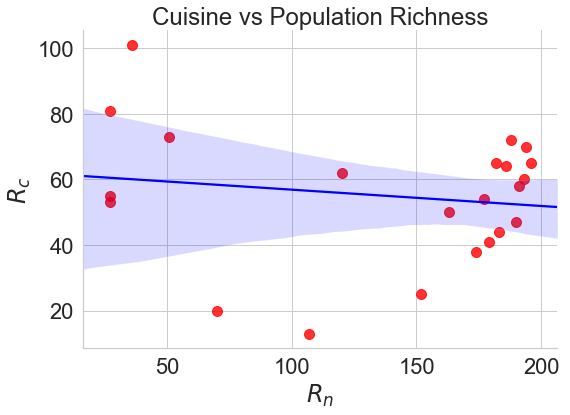

In [17]:
import statsmodels.api as sm
import seaborn as sns

X = nation_count
X = sm.add_constant(X)
y = cuisine_count

model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
X_pred = np.array( [(1,0),(1,200)] )
y_pred = model.predict(X_pred)

print(model.summary())

sns.set(font_scale=2)
sns.set_style("whitegrid")
X = nation_count
y = cuisine_count
df = pd.DataFrame({'X':X,'y':y})
g = sns.lmplot(x='X', y='y', data=df, height=6, aspect=1.4, 
               scatter_kws={"s": 100,"color": "red"}, line_kws={"color": "blue"});
plt.title("Cuisine vs Population Richness");
plt.xlabel("$R_n$");
plt.ylabel("$R_c$");
#g.savefig("RichnessRegressionPlot.png")

## Calculate Diversity indices for Population and Cuisines

In [18]:
def get_entropy(p):
    """ Takes in pandas series and returns the Shannon entropy """
    
    ' Calculate Shannon entropy '
    entropy = ( -1.0*p*np.log(p) ).sum()
    
    return entropy


def get_frequency(values, exclude_zeros=True):
    """ Takes in a pandas Series and returns normalised values """
    
    total = float( values.sum() )
    
    freq = values/float(total)
    
    if exclude_zeros == True:
        freq = freq[ freq>0 ]
    
    return freq


pop_entropy = []

for country in country_list:
    
    sCounts = df_demo[ country.lower() ]
    
    sFrequency = get_frequency(sCounts)
    
    pop_entropy.append( get_entropy(sFrequency) )


cuisine_entropy = []

for city in city_list:
    
    sCounts = df_cuisine_count[ city.lower() ]
    
    sFrequency = get_frequency(sCounts)
    
    cuisine_entropy.append( get_entropy(sFrequency) )


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.046
Method:                 Least Squares   F-statistic:                   0.08553
Date:                Wed, 16 Dec 2020   Prob (F-statistic):              0.773
Time:                        14:31:45   Log-Likelihood:                -11.442
No. Observations:                  22   AIC:                             26.88
Df Residuals:                      20   BIC:                             29.07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7523      0.144     19.124      0.0

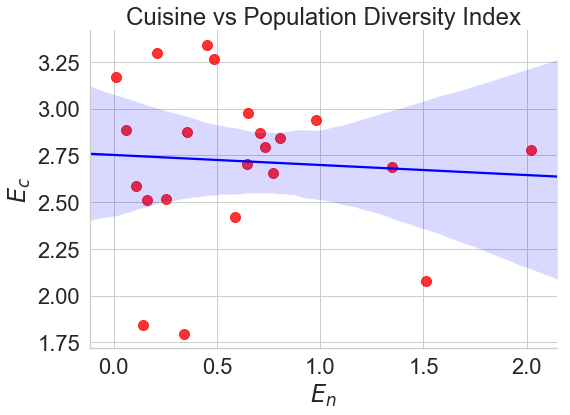

In [19]:
X = pop_entropy
X = sm.add_constant(X)
y = cuisine_entropy

model = sm.OLS(y, X).fit() 
X_pred = np.array( [(1,0),(1,2)] )
y_pred = model.predict(X_pred)

print(model.summary())

sns.set(font_scale=2)
sns.set_style("whitegrid")
X = pop_entropy
y = cuisine_entropy
df = pd.DataFrame({'X':X,'y':y})
g = sns.lmplot(x='X', y='y', data=df, height=6, aspect=1.4, 
               scatter_kws={"s": 100,"color": "red"}, line_kws={"color": "blue"});
plt.title("Cuisine vs Population Diversity Index");
plt.xlabel("$E_n$");
plt.ylabel("$E_c$");
#g.savefig("DiversityRegressionPlot.png")

# Clustering

## Cuisine Feature Vectors to be used in clustering

In [20]:
df_cuisine_vectors = df_cuisine_count.transpose()
df_cuisine_vectors.head()

,abruzzo,afghan,african,american,arepa,argentinian,asian,australian,austrian,bangladeshi,...,turkish home cooking,udon,ukrainian,umbrian,vegetarian / vegan,veneto,venezuelan,vietnamese,xinjiang,yemeni
dublin,0.0,1.0,5.0,11.0,2.0,3.0,72.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0
zurich,0.0,1.0,3.0,9.0,2.0,7.0,71.0,1.0,5.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,6.0,0.0,0.0
warsaw,0.0,17.0,16.0,44.0,6.0,3.0,203.0,2.0,1.0,0.0,...,0.0,1.0,5.0,0.0,4.0,0.0,0.0,76.0,0.0,0.0
vienna,0.0,4.0,5.0,23.0,1.0,3.0,243.0,2.0,191.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,2.0,34.0,0.0,0.0
riga,0.0,36.0,27.0,82.0,11.0,5.0,75.0,14.0,10.0,0.0,...,0.0,0.0,2.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0


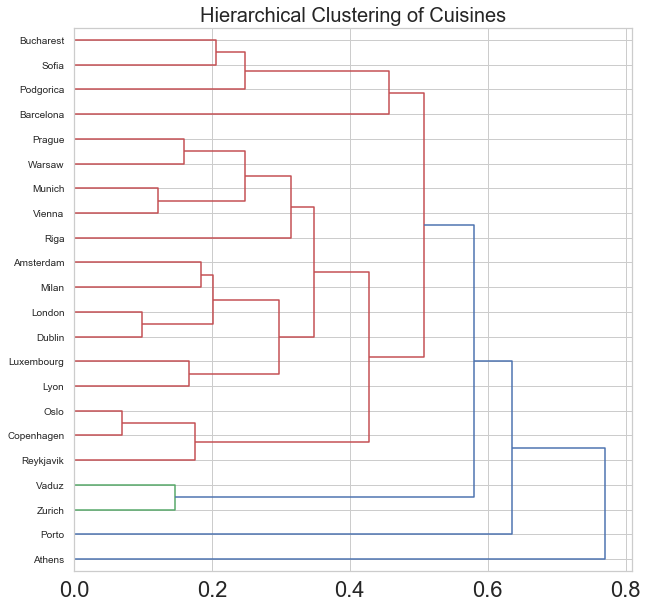

In [23]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
from sklearn.preprocessing import normalize

q = 0.5

X = df_cuisine_vectors

# Normalize features
X = normalize(X)
X = X**q
X = normalize(X)

# generate the linkage matrix
# method = single (min), complete (max), average, centroid, median, ward
# metric: ‘braycurtis’, ‘canberra’, ‘chebyshev’, ‘cityblock’, ‘correlation’, 
#         ‘cosine’, ‘dice’, ‘euclidean’, ‘hamming’, ‘jaccard’, ‘jensenshannon’, 
#         ‘kulsinski’, ‘mahalanobis’, ‘matching’, ‘minkowski’, ‘rogerstanimoto’, 
#         ‘russellrao’, ‘seuclidean’, ‘sokalmichener’, ‘sokalsneath’, ‘sqeuclidean’, ‘yule’
linked = linkage(X, method='complete', metric='cosine');

fig, ax = plt.subplots(1, 1, figsize=(10,10));

ax.set_title('Hierarchical Clustering of Cuisines', fontsize=20);

dendrogram(linked,
            orientation='right',
            labels=city_list,
            distance_sort='descending',
            show_leaf_counts=True);

#plt.savefig('Dendogram.png', format='png', bbox_inches='tight');

## Plot 10 clusters on Map

In [24]:
city_coords = [(53.3498,-6.2603),(47.3769,8.5417),(52.2297,21.0122),(48.2082,16.3738),
               (56.9496,24.1052),(50.0755,14.4378),(42.4304,19.2594),(37.9838,23.7275),
               (41.1579,-8.6291),(41.3851,2.1734),(45.4642,9.1900),(55.6761,12.5683),
               (64.1466,-21.9426),(45.7640,4.8357),(48.1351,11.5820),(49.6116,6.1319),
               (59.9139,10.7522),(47.1410,9.5209),(42.6977,23.3219),(52.3676,4.9041),
               (44.4268,26.1025),(51.5074,-0.1278)]

In [26]:
from sklearn.cluster import AgglomerativeClustering 

num_clusters = 10
hc = AgglomerativeClustering(n_clusters = num_clusters, affinity = 'cosine', linkage ='complete')
hc.fit(X)
labels = hc.labels_

# Coordinates of Central Europe
latitude = 49.503551
longitude = 9.5407

colors = ['red','blue','green','orange','#cc31ad','#3186cc','#edf728','#8cf536','darkred','#716987']

# create map of Toronto using latitude and longitude values
map_europe = folium.Map(location=[latitude, longitude], zoom_start=4)

# add markers to map
for i in range(len(city_list)):
    lat = city_coords[i][0]
    lng = city_coords[i][1]
    label = '{}'.format(city_list[i])
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=8,
        popup=label,
        color=colors[labels[i]],
        fill=True,
        fill_color=colors[labels[i]],
        fill_opacity=1,
        parse_html=False).add_to(map_europe)  

map_europe.fit_bounds([[60.96, 0], [37, 29]])
    
map_europe

## Plot 5 clusters on Map

In [27]:
from sklearn.cluster import AgglomerativeClustering 

num_clusters = 5
hc = AgglomerativeClustering(n_clusters = num_clusters, affinity = 'cosine', linkage ='complete')
hc.fit(X)
labels = hc.labels_

colors = ['red','blue','green','orange','#cc31ad']

# Coordinates of Central Europe
latitude = 49.503551
longitude = 9.5407

# create map of Toronto using latitude and longitude values
map_europe = folium.Map(location=[latitude, longitude], zoom_start=4)

# add markers to map
for i in range(len(city_list)):
    lat = city_coords[i][0]
    lng = city_coords[i][1]
    label = '{}'.format(city_list[i])
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=8,
        popup=label,
        color=colors[labels[i]],
        fill=True,
        fill_color=colors[labels[i]],
        fill_opacity=1,
        parse_html=False).add_to(map_europe)  

map_europe.fit_bounds([[60.96, 0], [37, 29]])
    
map_europe

## Boxplot

In [29]:
num_clusters = 10
hc = AgglomerativeClustering(n_clusters = num_clusters, affinity = 'cosine', linkage ='complete')
hc.fit(X)
labels = hc.labels_

labels1 = labels + 1
df = pd.DataFrame({'country':country_list,'cluster_id':labels1,'diversity':pop_entropy})
df = df[['country','cluster_id','diversity']]
df.head()

,country,cluster_id,diversity
0,Ireland,4,0.769847
1,Switzerland,10,1.348761
2,Poland,2,0.009112
3,Austria,2,0.979421
4,Latvia,9,0.207861


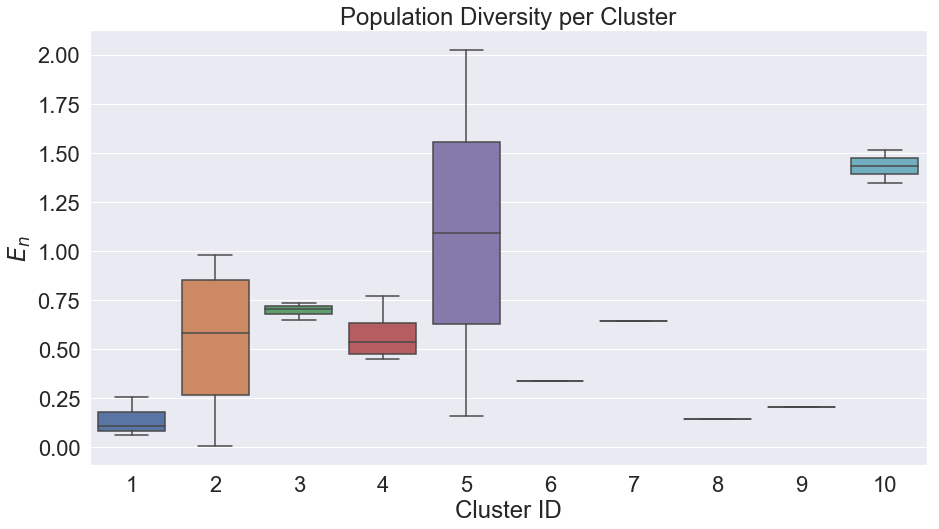

In [30]:
import seaborn as sns

plt.figure(figsize=(15,8))
sns.set(font_scale=2)
ax = sns.boxplot( x=df["cluster_id"], y=df["diversity"] );
ax.set_title('Population Diversity per Cluster');
ax.set_xlabel('Cluster ID');
ax.set_ylabel('$E_n$');
#ax.get_figure().savefig('BoxPlot.png')